License:

MIT License

Copyright (c) [2024] [Benjamin Cooper, Matthew Wolf, Gaurav Sethi, Viviana Maria Rivera Bali]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Load and Prepare the Dataset


In [171]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Determine whether any of the columns in the dataset are missing values.

In [172]:
import sklearn
import seaborn as sns

print(sklearn.__version__)

print(sns.__version__)


print(pd.__version__)

1.5.2
0.13.2
2.2.2


In [173]:
import sys
print(sys.version)

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]


In [174]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Filter the dataset to remove columns that won't be used, one-hot-encode the "Sex" and "Pclass" columns, and remove rows with missing values.

In [175]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [176]:
df

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True
...,...,...,...,...,...,...,...
885,0,39.0,True,False,False,False,True
886,0,27.0,False,True,False,True,False
887,1,19.0,True,False,True,False,False
889,1,26.0,False,True,True,False,False


The next step is to split the data into two datasets: one for training and one for testing. We'll use a stratified split to create a balanced distribution of samples in the training dataset and the testing dataset.

In [219]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_vali, y_train, y_vali= train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [220]:
x_train.shape #Training data

(571, 6)

In [221]:
x_vali.shape #Validation data

(143, 6)

In [222]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

# Model Evaluation

Get an accuracy score.

In [223]:
model.score(x_train, y_train)

0.7933450087565674

In [224]:
model.score(x_vali, y_vali)

0.8321678321678322

Correlation matrix

In [225]:
import seaborn as sns

<Axes: >

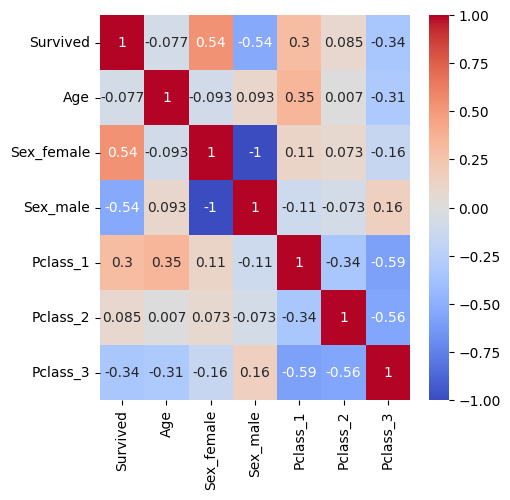

In [226]:
import matplotlib.pyplot as plt
map = df.corr()
mask = df.isna()
plt.figure(figsize=(5,5))
sns.heatmap(map, cmap ='coolwarm', annot=True)

Training Confusion Matrix

In [227]:
from sklearn.metrics import confusion_matrix

y_predicted_train = model.predict(x_train)
cm_train =confusion_matrix(y_train, y_predicted_train)
labels = ['Died', 'Survived']

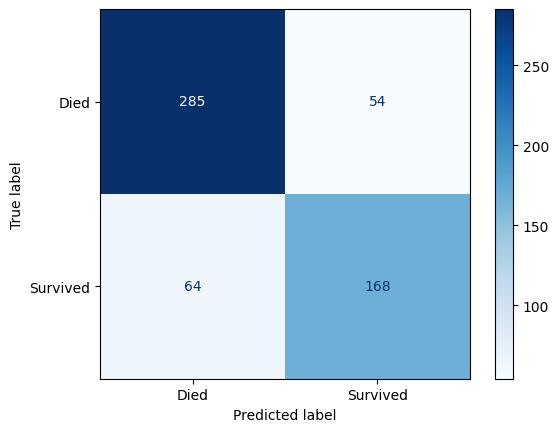

In [228]:
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
#matrix = confusion_matrix()

#d = confusion_matrix(model, x_test, y_test, display_labels=['Perished', 'Survived'], cmap='Blues', xticks_rotation='vertical')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels= labels)
disp.plot(cmap =plt.cm.Blues)
plt.show()

Print a classification report to view precision, recall, and other metrics.

Validation Confison Matrix

In [229]:
from sklearn.metrics import confusion_matrix

y_predicted_vali = model.predict(x_vali)
cm_vali =confusion_matrix(y_vali, y_predicted_vali)
labels = ['Died', 'Survived']

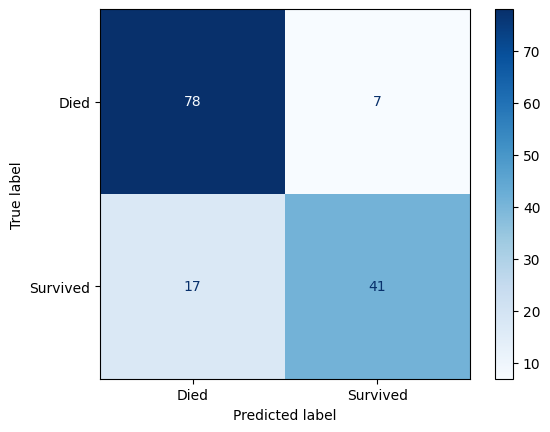

In [230]:
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

disp = ConfusionMatrixDisplay(confusion_matrix=cm_vali, display_labels= labels)
disp.plot(cmap =plt.cm.Blues)
plt.show()

#Pre-Processing for AIR and AUC

Appending Predctions to Data Table

In [231]:
x_vali

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
165,9.0,False,True,False,False,True
360,40.0,False,True,False,False,True
137,37.0,False,True,True,False,False
84,17.0,True,False,False,True,False
366,60.0,True,False,True,False,False
...,...,...,...,...,...,...
331,45.5,False,True,True,False,False
853,16.0,True,False,True,False,False
86,16.0,False,True,False,False,True
759,33.0,True,False,True,False,False


In [232]:
y_hat_vali = pd.DataFrame(y_predicted_vali).rename(columns ={0: 'Predicted'})
y_hat_vali

,Predicted
0,0
1,0
2,0
3,1
4,1
...,...
138,0
139,1
140,0
141,1


In [233]:
y_vali2 = y_test.reset_index().drop(columns = 'index')

In [234]:
actual_and_preds = pd.merge(y_vali2, y_hat_vali, left_index = True, right_index = True)
actual_and_preds

,Survived,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,0,0
141,1,1


In [235]:
y_vali2 = y_vali.reset_index().drop(columns = 'index')

In [236]:
actual_and_preds

,Survived,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
138,0,0
139,1,1
140,0,0
141,1,1


In [237]:
df_for_aic = pd.merge(actual_and_preds, x_test2, left_index = True, right_index = True)
df_for_aic

,Survived,Predicted,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,9.0,False,True,False,False,True
1,0,0,40.0,False,True,False,False,True
2,0,0,37.0,False,True,True,False,False
3,1,1,17.0,True,False,False,True,False
4,1,1,60.0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
138,0,0,45.5,False,True,True,False,False
139,1,1,16.0,True,False,True,False,False
140,0,0,16.0,False,True,False,False,True
141,1,1,33.0,True,False,True,False,False


Acceptance Rate First Class Pre Processing

In [238]:
first_class = df_for_aic.loc[df_for_aic['Pclass_1'] == True] #DF of women

In [239]:
first_class.shape

(34, 8)

In [240]:
first_class.loc[(first_class['Predicted'] == 1)].shape #Acceptance rate for first class is 19/34

(19, 8)

Acceptance Rate Second Class Pre Processing

In [241]:
second_class = df_for_aic.loc[df_for_aic['Pclass_2'] == True] #DF of women

In [242]:
second_class.shape

(33, 8)

In [243]:
second_class.loc[(second_class['Predicted'] == 1)].shape #Acceptance rate for second class is 15/33

(15, 8)

Acceptance Rate Third Class Pre Processing

In [244]:
third_class = df_for_aic.loc[df_for_aic['Pclass_3'] == True] #DF of women

In [245]:
third_class.shape

(76, 8)

In [246]:
third_class.loc[(third_class['Predicted'] == 1)].shape #Acceptance rate for second class is 14/76

(14, 8)

# Calculations of AIR and AUC

Calculations for AIR

In [247]:
#first class acceptance rate
accept_first = 19/34
accept_first

0.5588235294117647

In [248]:
#Second class acceptance rate
accept_second = 15/33
accept_second

0.45454545454545453

In [249]:
#Third class acceptance rate
accept_third = 14/76
accept_third

0.18421052631578946

In [250]:
#AIR of second class compared to first class
AIR_second_to_first = accept_second/accept_first
AIR_second_to_first

0.8133971291866028

In [251]:
#AIR of second class compared to first class
AIR_third_to_first = accept_third/accept_first
AIR_third_to_first

0.32963988919667586

AUC Calculations

In [252]:
from sklearn.metrics import roc_auc_score

In [253]:
#AUc for training data
auc_train = roc_auc_score(y_train, y_predicted_train)
auc_train

0.7824229478181263

In [254]:
#AUC for valid data
auc_vali = roc_auc_score(y_vali, y_predicted_vali)
auc_vali

0.8122718052738336

Accuracy Score

In [263]:
#Accurcacy for training data
453/571

0.7933450087565674

In [262]:
#Accuracy for validation Data
119/143

0.8321678321678322

Test Data For Kaggle

In [255]:
#read in test data file
test = pd.read_csv('test.csv')

In [256]:
#format test data file
testnew = test[['Age', 'Sex', 'Pclass']]
testnew2 = pd.get_dummies(testnew, columns=['Sex', 'Pclass'])

In [257]:
#fill in Null Age values with mean age, since it is continous.
testnew2['Age'] = testnew2['Age'].fillna(testnew2['Age'].mean())

In [258]:
#predict results
y_predicted_test = model.predict(testnew2)

In [259]:
#format the results for Kaggle submission, Save to CSV.
test_pred = pd.DataFrame(y_predicted_test).rename(columns ={0: 'Predicted'})
submit = pd.merge(test, test_pred, left_index = True, right_index = True)
submit.drop(columns = ['Age', 'Sex', 'Pclass','SibSp','Parch','Ticket','Fare', 'Cabin', 'Embarked','Name'], inplace = True)
submit.rename(columns = {'Predicted': 'Survived'}, inplace = True)
submit.to_csv('submit.csv', index = False)